In [1]:
import numpy as np
import pandas as pd
import ibm_db
import ibm_db_dbi

In [2]:
dsn_hostname = "1bbf73c5-d84a-4bb0-85b9-ab1a4348f4a4.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud"
dsn_uid = "xkk84284"        # e.g. "abc12345"
dsn_pwd = "QdRxktEwkW0eOMFE"      # e.g. "7dBZ3wWt9XN6$o0J"

dsn_driver = "{IBM DB2 ODBC DRIVER}"
dsn_database = "bludb"            # e.g. "BLUDB"
dsn_port = "32286"                # e.g. "32733"
dsn_protocol = "TCPIP"            # i.e. "TCPIP"
dsn_security = "SSL"          #i.e. "SSL"

dsn = (
    "DRIVER={0};"
    "DATABASE={1};"
    "HOSTNAME={2};"
    "PORT={3};"
    "PROTOCOL={4};"
    "UID={5};"
    "PWD={6};"
    "SECURITY={7};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd,dsn_security)
conn = ibm_db.connect(dsn, "", "")
pconn = ibm_db_dbi.Connection(conn)

# Query SQL from DB

Task 1

In [3]:
t1 = pd.read_sql(
  """
  SELECT COUNT(*)
  FROM CARDIO
  """,
pconn)
t1

,1
0,70000


Task 2

In [4]:
query = "SELECT COUNT(CARDIO) FROM CARDIO WHERE CARDIO=1"
t2 = pd.read_sql(query, pconn)
t2

,1
0,34979


Task 3

In [5]:
query = "SELECT COUNT(GENDER) FROM CARDIO WHERE GENDER=1"
t3 = pd.read_sql(query, pconn)
t3

,1
0,45530


Task 4

In [6]:
#1. Query statement 
query = "SELECT AP_HI,CARDIO FROM CARDIO ORDER BY AP_HI DESC LIMIT 10" 

#2. Execute statement 
results = ibm_db.exec_immediate(conn, query) 
#Fetch the rest of the rows 
count = 0 
while ibm_db.fetch_row(results) != False: 
    ap_hi = float(ibm_db.result(results, 0)) 
    cardio = int(ibm_db.result(results, "CARDIO")) 
    if cardio==1: count+=1 
    print(" AP_HI:",  ap_hi, "CARDIO:", cardio) 
print("There are {}/10 cases got illness.".format(count)) 


 AP_HI: 16020.0 CARDIO: 1
 AP_HI: 14020.0 CARDIO: 1
 AP_HI: 14020.0 CARDIO: 0
 AP_HI: 14020.0 CARDIO: 1
 AP_HI: 14020.0 CARDIO: 1
 AP_HI: 13010.0 CARDIO: 1
 AP_HI: 13010.0 CARDIO: 0
 AP_HI: 11500.0 CARDIO: 1
 AP_HI: 11020.0 CARDIO: 1
 AP_HI: 2000.0 CARDIO: 1
There are 8/10 cases got illness.


Task 5

In [7]:
#1. Query statement 
query = """SELECT WEIGHT,CARDIO FROM CARDIO
WHERE WEIGHT>(SELECT AVG(WEIGHT)
FROM CARDIO)
ORDER BY WEIGHT DESC LIMIT 10"""

#2. Execute statement 
results = ibm_db.exec_immediate(conn, query) 
#Fetch the rest of the rows 
count = 0 
while ibm_db.fetch_row(results) != False: 
    weight = float(ibm_db.result(results, 0)) 
    cardio = int(ibm_db.result(results, "CARDIO")) 
    if cardio==1: count+=1 
    print(" WEIGHT:",  weight, "CARDIO:", cardio) 
print("There are {}/10 cases got illness.".format(count))


 WEIGHT: 200.0 CARDIO: 0
 WEIGHT: 200.0 CARDIO: 1
 WEIGHT: 183.0 CARDIO: 1
 WEIGHT: 181.0 CARDIO: 1
 WEIGHT: 180.0 CARDIO: 1
 WEIGHT: 180.0 CARDIO: 1
 WEIGHT: 180.0 CARDIO: 1
 WEIGHT: 180.0 CARDIO: 1
 WEIGHT: 178.0 CARDIO: 0
 WEIGHT: 178.0 CARDIO: 1
There are 8/10 cases got illness.


Task 6

In [8]:
#1. Query statement 
query = "SELECT GLUC,CARDIO FROM CARDIO WHERE GLUC > 1 LIMIT 10" 

#2. Execute statement 
results = ibm_db.exec_immediate(conn, query) 
#Fetch the rest of the rows 
count = 0 
while ibm_db.fetch_row(results) != False: 
    gluc = float(ibm_db.result(results, 0)) 
    cardio = int(ibm_db.result(results, "CARDIO")) 
    if cardio==1: count+=1 
    print(" GLUC:",  gluc, "CARDIO:", cardio) 
print("There are {}/10 cases got illness.".format(count)) 

 GLUC: 2.0 CARDIO: 0
 GLUC: 3.0 CARDIO: 1
 GLUC: 3.0 CARDIO: 0
 GLUC: 2.0 CARDIO: 1
 GLUC: 3.0 CARDIO: 0
 GLUC: 3.0 CARDIO: 1
 GLUC: 2.0 CARDIO: 0
 GLUC: 2.0 CARDIO: 1
 GLUC: 2.0 CARDIO: 0
 GLUC: 2.0 CARDIO: 1
There are 5/10 cases got illness.


Task 7

In [9]:
#1. Query statement 
query = "SELECT AGE,CARDIO FROM CARDIO ORDER BY AGE DESC LIMIT 10" 

#2. Execute statement 
results = ibm_db.exec_immediate(conn, query) 
#Fetch the rest of the rows 
count = 0 
while ibm_db.fetch_row(results) != False: 
    age = float(ibm_db.result(results, 0)) 
    cardio = int(ibm_db.result(results, "CARDIO")) 
    if cardio==1: count+=1 
    print(" AGE:",  age, "CARDIO:", cardio) 
print("There are {}/10 cases got illness.".format(count))

 AGE: 64.0 CARDIO: 0
 AGE: 64.0 CARDIO: 1
 AGE: 64.0 CARDIO: 1
 AGE: 64.0 CARDIO: 0
 AGE: 64.0 CARDIO: 1
 AGE: 64.0 CARDIO: 1
 AGE: 64.0 CARDIO: 1
 AGE: 64.0 CARDIO: 0
 AGE: 64.0 CARDIO: 1
 AGE: 64.0 CARDIO: 1
There are 7/10 cases got illness.


Task 8

In [10]:
#1. Query statement 
query = "SELECT CHOLESTEROL,CARDIO FROM CARDIO WHERE CHOLESTEROL=3 LIMIT 10" 

#2. Execute statement 
results = ibm_db.exec_immediate(conn, query) 
#Fetch the rest of the rows 
count = 0 
while ibm_db.fetch_row(results) != False: 
    cocholesterol = float(ibm_db.result(results, 0)) 
    cardio = int(ibm_db.result(results, "CARDIO")) 
    if cardio==1: count+=1 
    print(" CHOLESTEROL:",  cocholesterol, "CARDIO:", cardio) 
print("There are {}/10 cases got illness.".format(count))

 CHOLESTEROL: 3.0 CARDIO: 1
 CHOLESTEROL: 3.0 CARDIO: 1
 CHOLESTEROL: 3.0 CARDIO: 0
 CHOLESTEROL: 3.0 CARDIO: 1
 CHOLESTEROL: 3.0 CARDIO: 1
 CHOLESTEROL: 3.0 CARDIO: 1
 CHOLESTEROL: 3.0 CARDIO: 1
 CHOLESTEROL: 3.0 CARDIO: 1
 CHOLESTEROL: 3.0 CARDIO: 1
 CHOLESTEROL: 3.0 CARDIO: 1
There are 9/10 cases got illness.


Task 9

In [11]:
# 1. Query statement 
query = "SELECT SMOKE,CARDIO FROM CARDIO WHERE SMOKE=1 LIMIT 10" 

#2. Execute statement 
results = ibm_db.exec_immediate(conn, query) 
#Fetch the rest of the rows 
count = 0 
while ibm_db.fetch_row(results) != False: 
    smoke = float(ibm_db.result(results, 0)) 
    cardio = int(ibm_db.result(results, "CARDIO")) 
    if cardio==1: count+=1 
    print(" SMOKE:",  smoke, "CARDIO:", cardio) 
print("There are {}/10 cases got illness.".format(count))

 SMOKE: 1.0 CARDIO: 0
 SMOKE: 1.0 CARDIO: 0
 SMOKE: 1.0 CARDIO: 1
 SMOKE: 1.0 CARDIO: 1
 SMOKE: 1.0 CARDIO: 1
 SMOKE: 1.0 CARDIO: 1
 SMOKE: 1.0 CARDIO: 0
 SMOKE: 1.0 CARDIO: 1
 SMOKE: 1.0 CARDIO: 1
 SMOKE: 1.0 CARDIO: 1
There are 7/10 cases got illness.


Task 10

In [12]:
#1. Query statement 
query = "SELECT ACTIVE,CARDIO FROM CARDIO WHERE ACTIVE=1 LIMIT 10" 

#2. Execute statement 
results = ibm_db.exec_immediate(conn, query) 
#Fetch the rest of the rows 
count = 0 
while ibm_db.fetch_row(results) != False: 
    active = float(ibm_db.result(results, 0)) 
    cardio = int(ibm_db.result(results, "CARDIO")) 
    if cardio==1: count+=1
    print(" ACTIVE:",  active, "CARDIO:", cardio) 
print("There are {}/10 cases got illness.".format(count))

 ACTIVE: 1.0 CARDIO: 0
 ACTIVE: 1.0 CARDIO: 1
 ACTIVE: 1.0 CARDIO: 1
 ACTIVE: 1.0 CARDIO: 0
 ACTIVE: 1.0 CARDIO: 1
 ACTIVE: 1.0 CARDIO: 0
 ACTIVE: 1.0 CARDIO: 0
 ACTIVE: 1.0 CARDIO: 0
 ACTIVE: 1.0 CARDIO: 0
 ACTIVE: 1.0 CARDIO: 0
There are 3/10 cases got illness.


In [13]:
import pandas as pd 
import ibm_db_dbi

#connection for pandas 
pconn = ibm_db_dbi.Connection(conn)

#query statement to retrieve all rows in CARDIO_TRAIN table
selectQuery = "select * from CARDIO"

#retrieve the query results into a pandas dataframe
df = pd.read_sql(selectQuery, pconn)

# df.to_csv("CARDIO_TRAIN.csv")

ibm_db.close(conn)

True

# Data Analysis with Python

In [14]:
df = pd.read_csv("./data/CARDIO_TRAIN.csv") 
df.head(10)

,Unnamed: 0,ID,AGE,GENDER,HEIGHT,WEIGHT,AP_HI,AP_LO,CHOLESTEROL,GLUC,SMOKE,ALCO,ACTIVE,CARDIO
0,0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
5,5,8,60,1,151,67.0,120,80,2,2,0,0,0,0
6,6,9,60,1,157,93.0,130,80,3,1,0,0,1,0
7,7,12,61,2,178,95.0,130,90,3,3,0,0,1,1
8,8,13,48,1,158,71.0,110,70,1,1,0,0,1,0
9,9,14,54,1,164,68.0,110,60,1,1,0,0,0,0


In [15]:
df.describe()

,Unnamed: 0,ID,AGE,GENDER,HEIGHT,WEIGHT,AP_HI,AP_LO,CHOLESTEROL,GLUC,SMOKE,ALCO,ACTIVE,CARDIO
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,34999.500000,49972.419900,52.840671,1.349571,164.359229,74.205686,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,20207.403759,28851.302323,6.766774,0.476838,8.210126,14.395761,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,0.000000,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17499.750000,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,34999.500000,50001.500000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,52499.250000,74889.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,69999.000000,99999.000000,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
df.isnull().sum()

AGE            0
GENDER         0
HEIGHT         0
WEIGHT         0
AP_HI          0
AP_LO          0
CHOLESTEROL    0
GLUC           0
SMOKE          0
ALCO           0
ACTIVE         0
CARDIO         0
dtype: int64

### Visualize data and calculate correlation

In [17]:
# Calculate correlation of CARDIO over others features. 
corr = df.corr().CARDIO.sort_values(ascending=False) 
corr

CARDIO         1.000000
AGE            0.237985
CHOLESTEROL    0.221147
WEIGHT         0.181659
GLUC           0.089307
AP_LO          0.065719
AP_HI          0.054475
GENDER         0.008109
Unnamed: 0     0.003800
ID             0.003799
ALCO          -0.007330
HEIGHT        -0.010821
SMOKE         -0.015486
ACTIVE        -0.035653
Name: CARDIO, dtype: float64

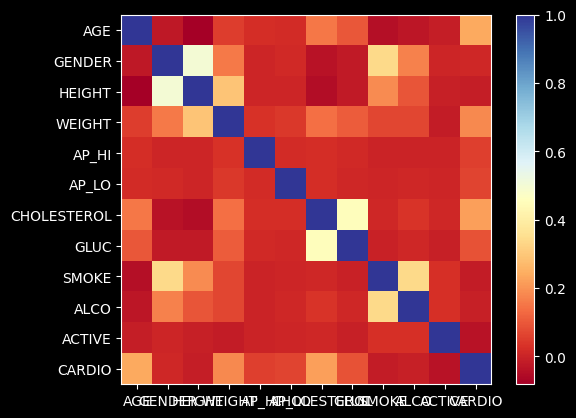

In [18]:
# Heat map for correlation using Matplotlib 
import matplotlib.pyplot as plt 
corr = df[['AGE','GENDER','HEIGHT','WEIGHT','AP_HI','AP_LO', 
          'CHOLESTEROL','GLUC','SMOKE','ALCO','ACTIVE','CARDIO']].corr() 
# Displaying dataframe as an heatmap 
# with diverging colourmap as RdYlBu 
plt.imshow(corr, cmap ="RdYlBu") 

# Displaying a color bar to understand 
# which color represents which range of data 
plt.colorbar() 

# Assigning labels of x-axis  
# according to dataframe 
plt.xticks(range(len(corr)), corr.columns) 

# Assigning labels of y-axis  
# according to dataframe 
plt.yticks(range(len(corr)), corr.index)

# Displaying the figure 
plt.show()

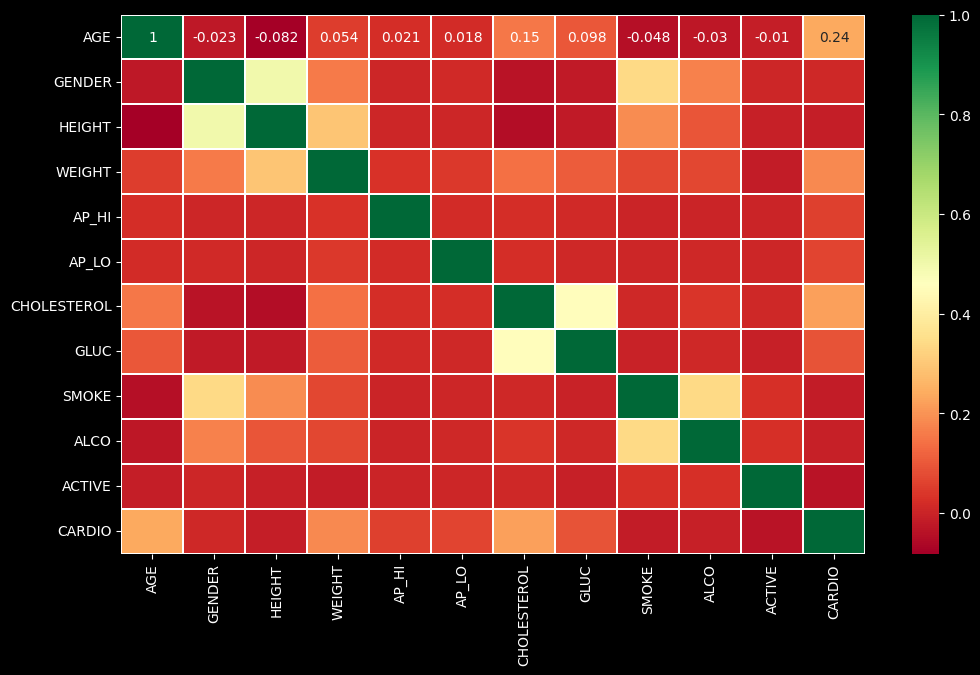

In [19]:
# Heat map for correlation using seaborn 
import seaborn as sns  
# Defining figure size   
# for the output plot  
fig, ax = plt.subplots(figsize = (12, 7))   
# Displaying dataframe as an heatmap  
# with diverging colourmap as RdYlGn 
sns.heatmap(corr, cmap ='RdYlGn', linewidths = 0.30, annot = True) 
plt.show()

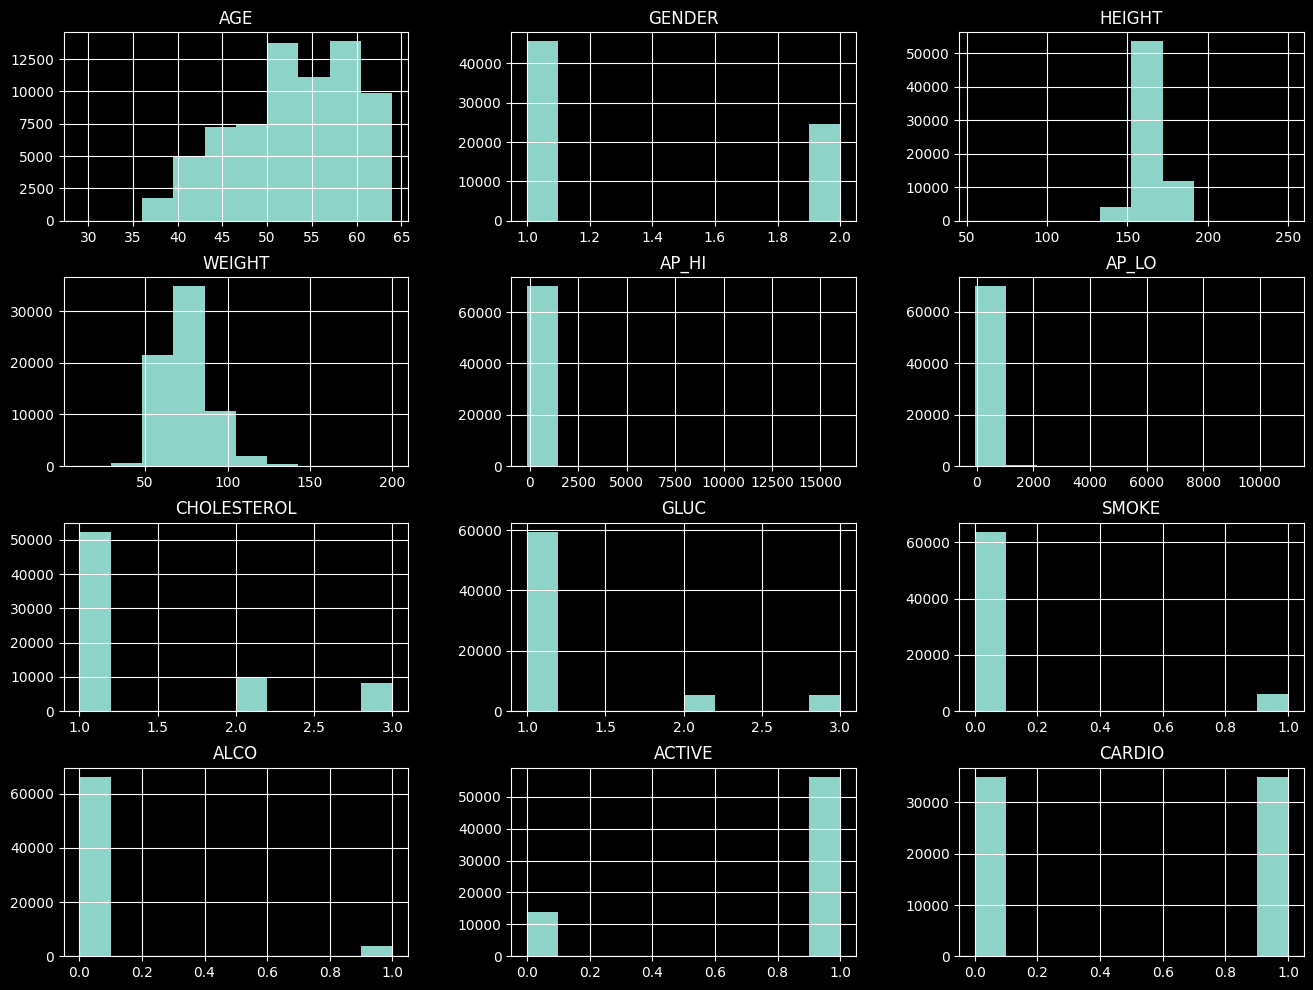

In [20]:
# Histogram of features 
df[['AGE','GENDER','HEIGHT','WEIGHT','AP_HI','AP_LO', 
    'CHOLESTEROL','GLUC','SMOKE','ALCO','ACTIVE','CARDIO']].hist(figsize=[16, 12]) 
plt.show()

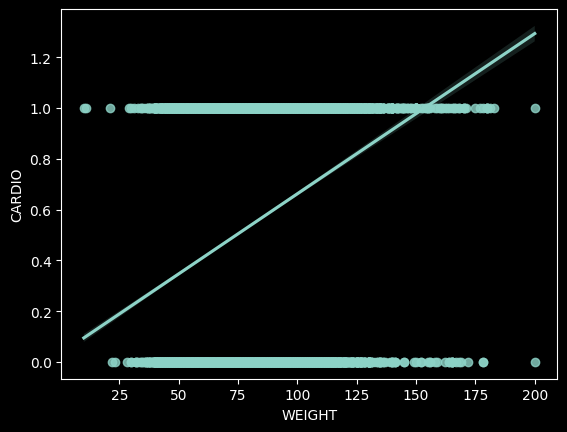

In [60]:
# draw regplot 
sns.regplot(x = "WEIGHT", 
            y = "CARDIO", 
            data = df, 
            dropna = True) 
# show the plot 
ax.set(xlabel='WEIGHT', ylabel='CARDIO') 
plt.show()

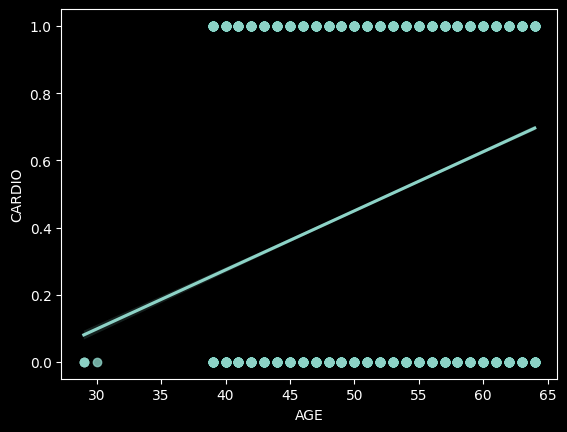

In [22]:
# draw regplot 
sns.regplot(x = "AGE", 
            y = "CARDIO", 
            data = df, 
            dropna = True) 
# show the plot 
ax.set(xlabel='AGE', ylabel='CARDIO')
plt.show()

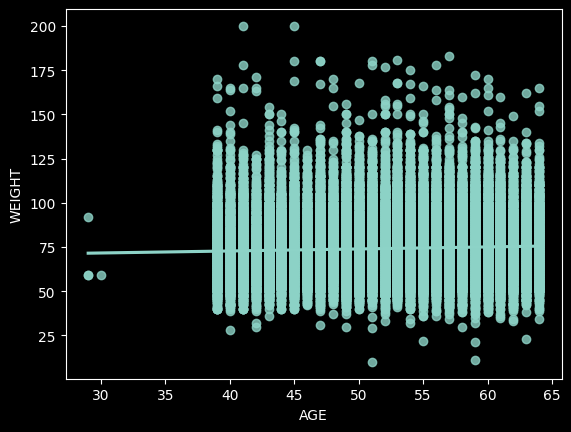

In [23]:
# draw regplot 
sns.regplot(x = "AGE", 
            y = "WEIGHT", 
            data = df, 
            dropna = True) 
# show the plot 
ax.set(xlabel='AGE', ylabel='WEIGHT') 
plt.show()

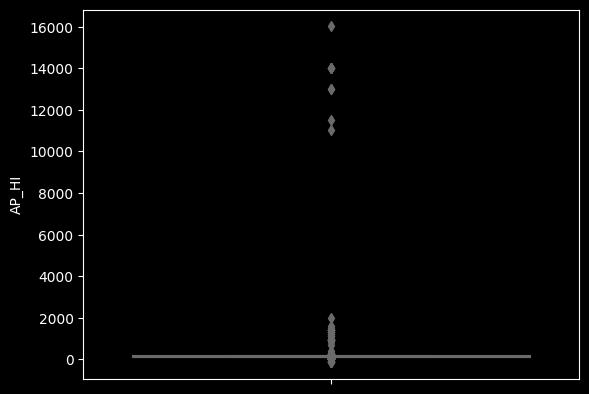

In [24]:
# Box plot for AP_H 
sns.boxplot(y= "AP_HI", data = df) 
plt.show()

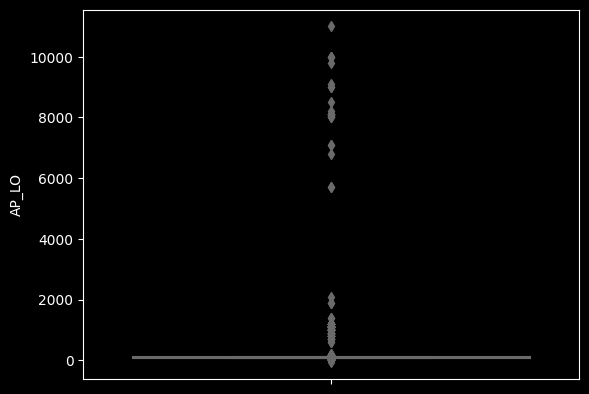

In [25]:
# Box plot for AP_LO 
sns.boxplot(y= "AP_LO", data = df) 
plt.show()

### Clean and standardize data

In [26]:
# Process for AP_HI 
first_quantile,third_quantile = df.AP_HI.quantile([0.25, 0.75]) 
iqr = third_quantile - first_quantile 
maximum = third_quantile + 1.5*iqr 
minimum = first_quantile - 1.5*iqr 
print("maximum:",maximum,"minimum:",minimum) 
df.loc[df.AP_HI>maximum,'AP_HI'] = maximum 
df.loc[df.AP_HI<minimum,'AP_HI'] = minimum 

maximum: 170.0 minimum: 90.0


In [27]:
# Process for AP_LO 
first_quantile,third_quantile = df.AP_LO.quantile([0.25, 0.75]) 
iqr = third_quantile - first_quantile 
maximum = third_quantile + 1.5*iqr 
minimum = first_quantile - 1.5*iqr 
print("maximum:",maximum,"minimum:",minimum) 
df.loc[df.AP_LO>maximum,'AP_LO'] = maximum 
df.loc[df.AP_LO<minimum,'AP_LO'] = minimum

maximum: 105.0 minimum: 65.0


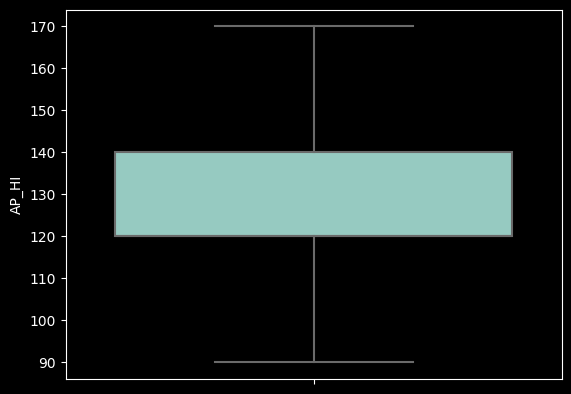

In [28]:
# Redraw Box plot for AP_H 
sns.boxplot(y= "AP_HI", data = df) 
plt.show()

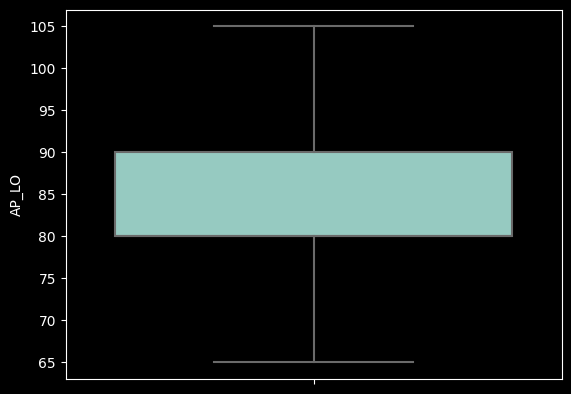

In [29]:
# Redraw Box plot for AP_H 
sns.boxplot(y= "AP_LO", data = df) 
plt.show()

### Statistic

CHOLESTEROL vs CARDIO

In [30]:
# Importing library 
from scipy.stats import f_oneway 
# Conduct the one-way ANOVA 
low_cholesterol=df[df['CHOLESTEROL']==1].CARDIO 
high_cholesterol=df[df['CHOLESTEROL']==2].CARDIO 
very_high_cholesterol = df[df['CHOLESTEROL']==3].CARDIO 
f_statistic, p_value = f_oneway(low_cholesterol, high_cholesterol, very_high_cholesterol) 
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value)) 

F_Statistic: 1799.6607856699602, P-Value: 0.0


AGE vs CARDIO

In [31]:
from scipy.stats import levene,ttest_ind 
lower_age_group = df[df.AGE<df.AGE.mean()].CARDIO 
higher_age_group = df[df.AGE>=df.AGE.mean()].CARDIO 

# Using levene test to check whether 2 variance is equal 
f_statistic, p_value =levene(lower_age_group, 
                  higher_age_group, center='mean') 
print("Levene Test: F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value)) 
# If p-value is greater than 0.05 we can assume equality of variance 

f_statistic, p_value = ttest_ind(lower_age_group, 
                  higher_age_group, equal_var = p_value>0.05) 
print("T-Test: F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value)) 

Levene Test: F_Statistic: 133.98315419526062, P-Value: 5.88006908232294e-31
T-Test: F_Statistic: -52.51350890203989, P-Value: 0.0


WEIGHT vs CARDIO

In [32]:
from scipy.stats import pearsonr 
coeff, p_value = pearsonr(df.WEIGHT, df.CARDIO) 
print("coeff:",coeff,"p_value:",p_value)

coeff: 0.18165940834451666 p_value: 0.0


ALCOHOL vs CARDIO

In [33]:
from scipy.stats import chi2_contingency 
# Create a cross tab table  
cont_table  = pd.crosstab(df.ALCO, df.CARDIO) 
 
# calculate chi square values 
chi2_contingency(cont_table, correction = True) 

Chi2ContingencyResult(statistic=3.696547466479263, pvalue=0.05452518218322108, dof=1, expected_freq=array([[33137.8708, 33098.1292],
       [ 1883.1292,  1880.8708]]))

OSL Model

`Prob > F` = 0.0000: Thể hiện mức ý nghĩa kiểm định F với giả thuyết H0: Các biến độc lập đồng thời bằng 0, ở đây ta bác bỏ H0 và kết luận mô hình có ý nghĩa thống kê

`R – squared` = 0.1100: R bình phương – R2 mà chúng ta học trong KTL

`Adj R-squared` = 0.1018: Gọi là R bình phương hiệu chỉnh tức thể hiện các biến độc lập trong mô hình đang giải thích được khoảng 10.18% sự biến thiên của biến phụ thuộc CASH trong mô hình.

Chỉ số R hiệu chỉnh (`Adj R-squared`) là chỉ số quan trọng đánh giá độ mạnh yếu của mô hình và tốt nhất chúng ta kỳ vọng nó lớn hơn 50% nhé!

`Coef.` : là hệ số hồi quy của mỗi biến độc lập trong mô hình hồi quy (Còn gọi là Beta)

Ngoài ra bên phải cột này là cột `Std. Err`. tức sai số chuẩn và cột giá trị t

`P > |t|` : Hay p – value thể hiện mức ý nghĩa của mỗi biến độc lập trong mô hình.

`P-value` thường được so sánh với mức ý nghĩa 5% nếu dưới mức này ta kết luận biến độc lập có mối quan hệ với biến phụ thuộc và ngược lại. (Lưu ý: Có thể so sánh với mức ý nghĩa 10% và 1% lun bạn nhé!)

In [34]:
from statsmodels.formula.api import ols 
import statsmodels.api as sm 
## X is the input variables (or independent variables) 
X = df[['AGE','GENDER','HEIGHT','WEIGHT','AP_HI','AP_LO', 
        'CHOLESTEROL','GLUC','SMOKE','ALCO','ACTIVE']] 

## add an intercept (beta_0) to our model 
X = sm.add_constant(X)   

## y is the target/dependent variable 
y = df['CARDIO'] 

model = sm.OLS(y, X).fit() 
predictions = model.predict(X) 

# Print out the statistics 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 CARDIO   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     1954.
Date:                Tue, 07 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:28:13   Log-Likelihood:                -41431.
No. Observations:               70000   AIC:                         8.289e+04
Df Residuals:                   69988   BIC:                         8.300e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.6708      0.042    -39.948      0.000      -1.753      -1.589
AGE             0.0101      0.000     40.131      0.000       0.010       0.011
GENDER         -0.0041      0.004     -0.979      0.328      -0.012       0.004
HEIGHT         -0.0008      0.000     -3.229      0.001      -0.001      -0.000
WEIGHT          0.0021      0.000     16.542      0.000       0.002       0.002
AP_HI           0.0096      0.000     64.319      0.000       0.009       0.010
AP_LO           0.0040      0.000     14.993      0.000       0.003       0.005
CHOLESTEROL     0.0941      0.003     33.686      0.000       0.089       0.100
GLUC           -0.0207      0.003     -6.381      0.000      -0.027      -0.014
SMOKE          -0.0257      0.007     -3.953      0.000      -0.039      -0.013
ALCO           -0.0379      0.008     -4.840      0.000      -0.053      -0.023
ACTIVE         -0.0437      0.004    -10.487      0.000      -0.052      -0.036
==============================================================================
Omnibus:                    26450.210   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3466.466
Skew:                           0.049   Prob(JB):                         0.00
Kurtosis:                       1.914   Cond. No.                     6.11e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Prediction

In [35]:
df = pd.read_csv("./data/CARDIO_TRAIN.csv")
df = df.drop(columns="Unnamed: 0")

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           70000 non-null  int64  
 1   AGE          70000 non-null  int64  
 2   GENDER       70000 non-null  int64  
 3   HEIGHT       70000 non-null  int64  
 4   WEIGHT       70000 non-null  float64
 5   AP_HI        70000 non-null  int64  
 6   AP_LO        70000 non-null  int64  
 7   CHOLESTEROL  70000 non-null  int64  
 8   GLUC         70000 non-null  int64  
 9   SMOKE        70000 non-null  int64  
 10  ALCO         70000 non-null  int64  
 11  ACTIVE       70000 non-null  int64  
 12  CARDIO       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [37]:
df.isnull().sum()

ID             0
AGE            0
GENDER         0
HEIGHT         0
WEIGHT         0
AP_HI          0
AP_LO          0
CHOLESTEROL    0
GLUC           0
SMOKE          0
ALCO           0
ACTIVE         0
CARDIO         0
dtype: int64

In [38]:
corr = df.corr()
corr["CARDIO"].sort_values(ascending=False)

CARDIO         1.000000
AGE            0.237985
CHOLESTEROL    0.221147
WEIGHT         0.181659
GLUC           0.089307
AP_LO          0.065719
AP_HI          0.054475
GENDER         0.008109
ID             0.003799
ALCO          -0.007330
HEIGHT        -0.010821
SMOKE         -0.015486
ACTIVE        -0.035653
Name: CARDIO, dtype: float64

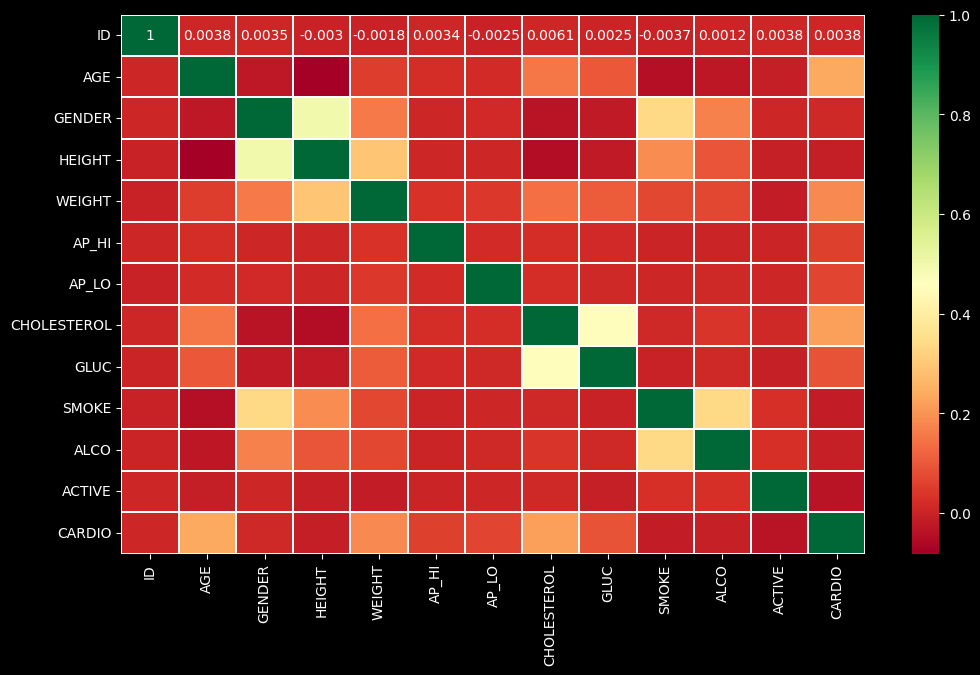

In [39]:
# Heat map for correlation using seaborn
import seaborn as sns
# Defining figure size
# for the output plot
fig, ax = plt.subplots(figsize = (12, 7))
# Displaying dataframe as an heatmap
# with diverging colourmap as RdYlGn
sns.heatmap(corr, cmap ='RdYlGn', linewidths = 0.30, annot = True)
plt.show()

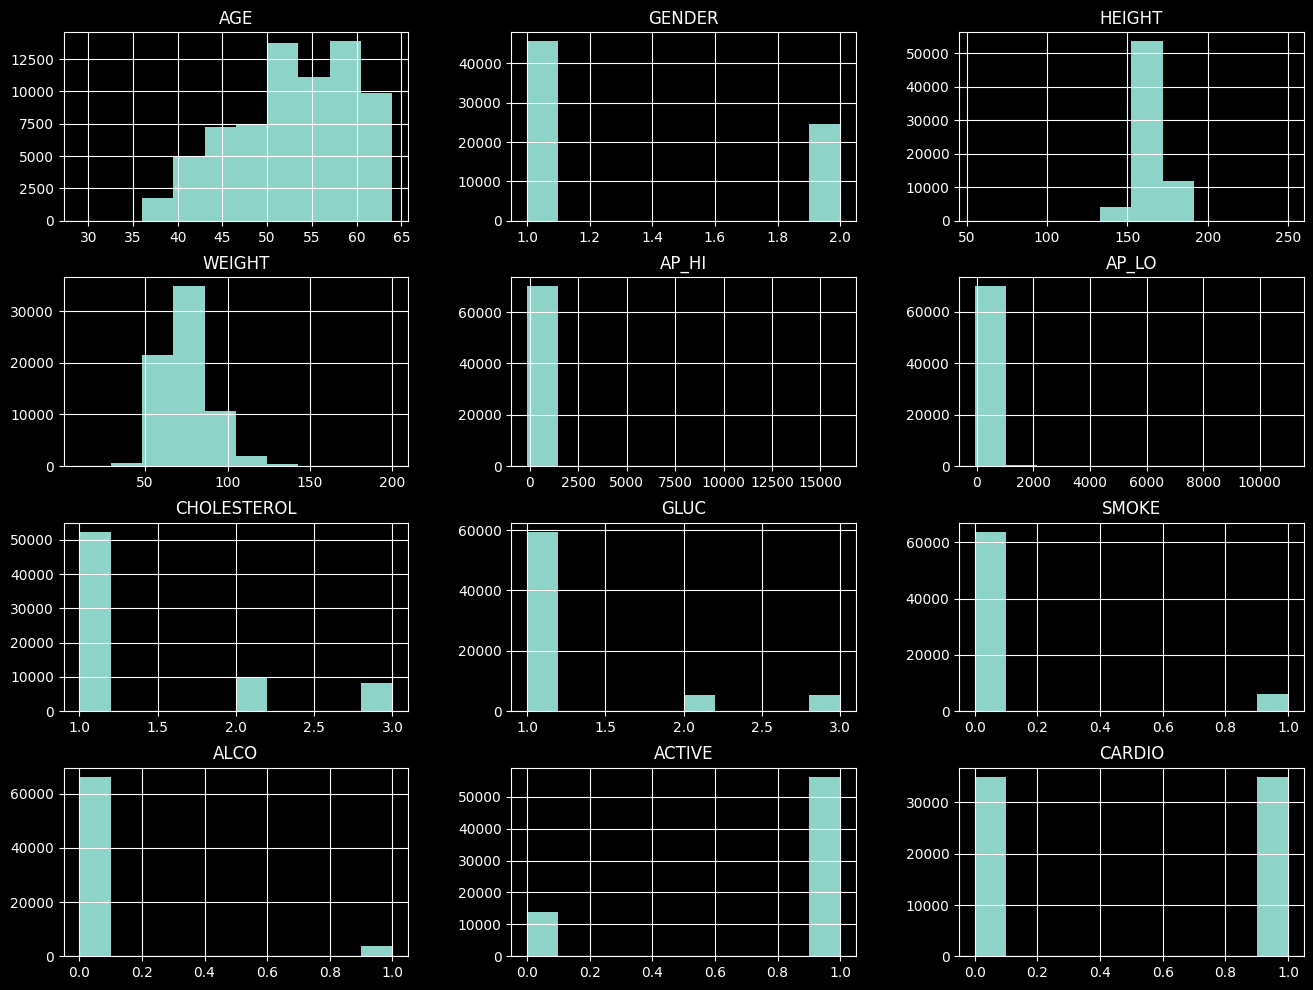

In [40]:
# Histogram of features 
df[['AGE','GENDER','HEIGHT','WEIGHT','AP_HI','AP_LO', 
    'CHOLESTEROL','GLUC','SMOKE','ALCO','ACTIVE','CARDIO']].hist(figsize=[16, 12]) 
plt.show()

In [41]:
df[["GENDER", "ALCO", "ID", "CARDIO"]]

,GENDER,ALCO,ID,CARDIO
0,2,0,0,0
1,1,0,1,1
2,1,0,2,1
3,2,0,3,1
4,1,0,4,0
...,...,...,...,...
69995,2,0,99993,0
69996,1,0,99995,1
69997,2,1,99996,1
69998,1,0,99998,1


In [42]:
df.columns

Index(['ID', 'AGE', 'GENDER', 'HEIGHT', 'WEIGHT', 'AP_HI', 'AP_LO',
       'CHOLESTEROL', 'GLUC', 'SMOKE', 'ALCO', 'ACTIVE', 'CARDIO'],
      dtype='object')

In [43]:
# from sklearn.preprocessing import StandardScaler
# import numpy as np

# feature= ['CHOLESTEROL', 'GLUC', 'SMOKE', 'ACTIVE', 'CARDIO']
# scale_feature= ['AGE', 'HEIGHT', 'WEIGHT', 'AP_HI', 'AP_LO']
# df[scale_feature + feature]

# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(df[scale_feature])
# data = np.concatenate([scaled_data, df[feature].values], axis=1)
# data.shape

# X = data[:, :-1]
# y = data[:, -1]

In [44]:
df = df[['AGE','GENDER','HEIGHT','WEIGHT','AP_HI','AP_LO', 
        'CHOLESTEROL','GLUC','SMOKE','ALCO','ACTIVE','CARDIO']] 

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(df[['AGE', 'HEIGHT', 'WEIGHT', 'AP_HI', 'AP_LO']])

In [46]:
import numpy as np
data = np.concatenate([data,df[['GENDER','CHOLESTEROL','GLUC','SMOKE','ALCO','ACTIVE','CARDIO']]], axis=1)
X = data[:,:11] 
y = data[:,11]
#data.shape (70000, 12)
print(X.shape,y.shape) #(70000, 11) (70000,)

(70000, 11) (70000,)


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Ridge Classifier

In [56]:
from sklearn.linear_model import RidgeClassifier 

ridge = RidgeClassifier(solver = 'auto', alpha = 100, class_weight="balanced", fit_intercept=True)
ridge.fit(X_train, y_train)
y_hat = ridge.predict(X_test)
accuracy_score(y_test, y_hat) # 0.6505714285714286

0.6505714285714286

### Random Forest

In [49]:
# from sklearn.ensemble import RandomForestClassifier 
# rndF = RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=300) 
# #Train
# rndF.fit(X_train,y_train)
# #Evaluation
# y_hat = rndF.predict(X_test)
# accuracy_score(y_test, y_hat) # 0.7387142857142858

In [50]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10]
# }

# grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
# grid_search.fit(X_train, y_train)
# best_params = grid_search.best_params_
# best_params

### Gradient Boosting

In [51]:
# from sklearn.ensemble import GradientBoostingClassifier 
# gbc = GradientBoostingClassifier(learning_rate=0.1, max_features=6, n_estimators=256) 
# gbc.fit(X_train,y_train)
# #Evaluation
# y_hat = gbc.predict(X_test)
# accuracy_score(y_test, y_hat) # 0.7400476190476191

In [52]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 4, 5],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'min_samples_split': [2, 5, 10]
# }

# grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5)
# grid_search.fit(X_train, y_train)
# best_params = grid_search.best_params_
# best_params

### Ada Boost

Techniques such as ensemble approaches combine many models to increase classification accuracy. When more than one model fails to adequately represent the dataset, ensemble approaches might be helpful. Here are a few popular ensemble techniques:

Bagging: In bagging, various models are trained on various subsets of the data, and the predictions are then combined to get the final forecast. This may aid in lowering the model's variance and enhancing its accuracy.

Boosting is the process of successively training many models, each one concentrating on the data points that the earlier models incorrectly categorised. This may aid in lowering the model's bias and raising its accuracy.

Stacking is the process of training numerous models and feeding the predictions of those models into a meta−model. The final prediction is then made by the meta−model. Combining the benefits of many models through stacking can increase accuracy overall.

In [55]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
adac = AdaBoostClassifier(n_estimators=64, learning_rate=1, random_state=0, estimator=lr)
adac.fit(X_train, y_train) 
#Evaluation
y_hat = adac.predict(X_test)
accuracy_score(y_test, y_hat) # 0.6494285714285715

0.6494285714285715

In [ ]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 0.5]
# }

# grid_search = GridSearchCV(AdaBoostClassifier(random_state=0), param_grid, cv=5)
# grid_search.fit(X_train, y_train)
# best_params = grid_search.best_params_
# best_params

### Bagging Classifier

In [ ]:
# from sklearn.ensemble import BaggingClassifier
# from sklearn.neighbors import KNeighborsClassifier
# baggc = BaggingClassifier(KNeighborsClassifier(), max_samples=0.7, max_features=0.5, n_estimators=200) 
# baggc.fit(X_train,y_train)
# y_hat = baggc.predict(X_test)
# accuracy_score(y_test, y_hat) # 0.7332857142857143

### Extra Tree Classifier

In [ ]:
# from sklearn.ensemble import ExtraTreesClassifier 
# eTrc= ExtraTreesClassifier(n_estimators=100, random_state=0, max_depth=20)
# eTrc.fit(X_train,y_train)
# y_hat = eTrc.predict(X_test)
# accuracy_score(y_test, y_hat) # 0.7219523809523809

In [ ]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10]
# }

# grid_search = GridSearchCV(ExtraTreesClassifier(random_state=0), param_grid, cv=5)
# grid_search.fit(X_train, y_train)
# best_params = grid_search.best_params_
# best_params

### Stack Classifier

In [ ]:
# from sklearn.linear_model import RidgeClassifier 
# from sklearn.neighbors import KNeighborsClassifier 
# from sklearn.ensemble import StackingClassifier 
# estimators = [
#   ('ridge', RidgeClassifier()), 
#   ('knr', KNeighborsClassifier(n_neighbors=20, metric='euclidean'))
# ]
# final_estimator = GradientBoostingClassifier( 
#   n_estimators=25, subsample=0.5, min_samples_leaf=25, max_features=1, 
#   random_state=42
# )
# stackC = StackingClassifier(
#   estimators=estimators, 
#   final_estimator=final_estimator
# ) 
# stackC.fit(X_train,y_train) 
# y_hat = stackC.predict(X_test)
# accuracy_score(y_test, y_hat) # 0.6726190476190477

In [ ]:
# from sklearn.ensemble import StackingClassifier
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC

# # Define the base classifiers
# base_classifiers = [
#   ('lr', LogisticRegression(max_iter=1000)),
#   ('rf', RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=300)),
#   ('svc', SVC(probability=True, kernel='linear')),
#   # ('ada', AdaBoostClassifier(n_estimators=200, learning_rate=0.5, random_state=0)),
#   # ('gdc', GradientBoostingClassifier(learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=200))
# ]

# # Define the final estimator
# final_estimator = GradientBoostingClassifier(n_estimators=100, random_state=0)

# # Create the StackingClassifier
# stacked_classifier = StackingClassifier(
#   estimators=base_classifiers,
#   final_estimator=final_estimator
# )

# # Fit the StackingClassifier on the training data
# stacked_classifier.fit(X_train, y_train)

# # Make predictions
# y_hat = stacked_classifier.predict(X_test)

# # Evaluate accuracy
# accuracy = accuracy_score(y_test, y_hat)
# print("Accuracy:", accuracy)

In [ ]:
# from sklearn.linear_model import LogisticRegression
# lg = LogisticRegression(C=100)
# lg.fit(X_train,y_train)
# y_hat = lg.predict(X_test)
# accuracy_score(y_test, y_hat) # 0.721

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression

# param_grid = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100],
# }

# grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
# grid_search.fit(X_train, y_train)
# best_params = grid_search.best_params_
# best_params

In [ ]:
# from sklearn.svm import SVC
# svc = SVC(C=10)
# svc.fit(X_train,y_train)
# y_hat = svc.predict(X_test)
# accuracy_score(y_test, y_hat)

In [ ]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'C': [0.1, 1, 10],
#     'kernel': ['linear', 'rbf', 'poly'],
#     'gamma': ['scale', 'auto', 0.1, 1]
# }

# grid_search = GridSearchCV(SVC(), param_grid, cv=5)
# grid_search.fit(X_train, y_train)
# best_params = grid_search.best_params_
# best_params